In [98]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [99]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [100]:
NUM_CLASSES = 34

# Dataset reading

In [101]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [102]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [104]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [105]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [106]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [107]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                6960      
                                                                 
 dropout_8 (Dropout)         (None, 80)                0         
                                                                 
 dense_17 (Dense)            (None, 100)               8100      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 34)                1734      
                                                                 
Total params: 21844 (85.33 KB)
Trainable params: 21844

In [108]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [109]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [110]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3400
13/25 [==============>...............] - ETA: 0s - loss: 3.4768 - accuracy: 0.0613 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 1s 18ms/step - loss: 3.3856 - accuracy: 0.0778 - val_loss: 3.0886 - val_accuracy: 0.0978
Epoch 2/3400
22/25 [=========================>....] - ETA: 0s - loss: 2.9121 - accuracy: 0.1314

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 2.8941 - accuracy: 0.1378 - val_loss: 2.5496 - val_accuracy: 0.2449
Epoch 3/3400
16/25 [==================>...........] - ETA: 0s - loss: 2.5685 - accuracy: 0.1934
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 2.5068 - accuracy: 0.2120 - val_loss: 2.1505 - val_accuracy: 0.3756
Epoch 4/3400
12/25 [=============>................] - ETA: 0s - loss: 2.2553 - accuracy: 0.2812
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 2.1965 - accuracy: 0.2933 - val_loss: 1.8074 - val_accuracy: 0.5005
Epoch 5/3400
24/25 [===========================>..] - ETA: 0s - loss: 1.9080 - accuracy: 0.3678
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [============

25/25 [==============================] - 0s 7ms/step - loss: 0.3474 - accuracy: 0.8800 - val_loss: 0.2303 - val_accuracy: 0.9351
Epoch 30/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.3498 - accuracy: 0.8672
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 7ms/step - loss: 0.3415 - accuracy: 0.8745 - val_loss: 0.2131 - val_accuracy: 0.9400
Epoch 31/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.3460 - accuracy: 0.8739
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.3361 - accuracy: 0.8780 - val_loss: 0.2084 - val_accuracy: 0.9322
Epoch 32/3400
15/25 [=================>............] - ETA: 0s - loss: 0.3455 - accuracy: 0.8714
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.3315 - accuracy: 0.8751 - va

Epoch 57/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.1912 - accuracy: 0.9213
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.1964 - accuracy: 0.9219 - val_loss: 0.1295 - val_accuracy: 0.9652
Epoch 58/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.1749 - accuracy: 0.9347
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.1744 - accuracy: 0.9403 - val_loss: 0.1218 - val_accuracy: 0.9642
Epoch 59/3400
13/25 [==============>...............] - ETA: 0s - loss: 0.1725 - accuracy: 0.9435
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.1736 - accuracy: 0.9387 - val_loss: 0.1227 - val_accuracy: 0.9613
Epoch 60/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.1810 - accuracy: 0

22/25 [=========================>....] - ETA: 0s - loss: 0.1134 - accuracy: 0.9652
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.1158 - accuracy: 0.9639 - val_loss: 0.0966 - val_accuracy: 0.9758
Epoch 85/3400
23/25 [==========================>...] - ETA: 0s - loss: 0.1117 - accuracy: 0.9609
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.1106 - accuracy: 0.9613 - val_loss: 0.0915 - val_accuracy: 0.9864
Epoch 86/3400
22/25 [=========================>....] - ETA: 0s - loss: 0.1058 - accuracy: 0.9613
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9632 - val_loss: 0.0832 - val_accuracy: 0.9874
Epoch 87/3400
22/25 [=========================>....] - ETA: 0s - loss: 0.1044 - accuracy: 0.9659
Epoch 87

21/25 [========================>.....] - ETA: 0s - loss: 0.0719 - accuracy: 0.9769
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.0708 - accuracy: 0.9774 - val_loss: 0.0631 - val_accuracy: 0.9894
Epoch 112/3400
21/25 [========================>.....] - ETA: 0s - loss: 0.0700 - accuracy: 0.9807
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.0717 - accuracy: 0.9793 - val_loss: 0.0576 - val_accuracy: 0.9894
Epoch 113/3400
16/25 [==================>...........] - ETA: 0s - loss: 0.0672 - accuracy: 0.9756
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9771 - val_loss: 0.0603 - val_accuracy: 0.9913
Epoch 114/3400
19/25 [=====================>........] - ETA: 0s - loss: 0.0736 - accuracy: 0.9778
Ep

Epoch 138/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9888
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0496 - val_accuracy: 0.9913
Epoch 139/3400
13/25 [==============>...............] - ETA: 0s - loss: 0.0586 - accuracy: 0.9808
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 7ms/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.0491 - val_accuracy: 0.9894
Epoch 140/3400
16/25 [==================>...........] - ETA: 0s - loss: 0.0464 - accuracy: 0.9854
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0570 - val_accuracy: 0.9913
Epoch 141/3400
14/25 [===============>..............] - ETA: 0s - loss: 0.0483 - accu

Epoch 165/3400
20/25 [=======================>......] - ETA: 0s - loss: 0.0303 - accuracy: 0.9883
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0299 - accuracy: 0.9887 - val_loss: 0.0522 - val_accuracy: 0.9903
Epoch 166/3400
20/25 [=======================>......] - ETA: 0s - loss: 0.0339 - accuracy: 0.9883
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.0602 - val_accuracy: 0.9884
Epoch 167/3400
20/25 [=======================>......] - ETA: 0s - loss: 0.0385 - accuracy: 0.9883
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0475 - val_accuracy: 0.9932
Epoch 168/3400
20/25 [=======================>......] - ETA: 0s - loss: 0.0282 - a

Epoch 192/3400
19/25 [=====================>........] - ETA: 0s - loss: 0.0316 - accuracy: 0.9901
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0481 - val_accuracy: 0.9913
Epoch 193/3400
21/25 [========================>.....] - ETA: 0s - loss: 0.0278 - accuracy: 0.9929
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0286 - accuracy: 0.9929 - val_loss: 0.0484 - val_accuracy: 0.9932
Epoch 194/3400
21/25 [========================>.....] - ETA: 0s - loss: 0.0239 - accuracy: 0.9926
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0471 - val_accuracy: 0.9923
Epoch 195/3400
20/25 [=======================>......] - ETA: 0s - loss: 0.0312 - a

In [111]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9932


In [112]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [113]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 171ms/step
[2.0447865e-14 9.8867838e-09 9.9666291e-01 1.5170581e-09 2.4383593e-16
 6.3065559e-06 8.8804285e-12 1.1243562e-09 1.3684248e-08 1.7784010e-12
 1.5595427e-14 1.0743674e-12 5.7484737e-12 2.3312373e-06 4.3723511e-11
 3.3230367e-03 2.3341036e-09 3.0746016e-08 2.9533547e-08 3.8668090e-11
 2.0937299e-09 2.3862725e-08 1.5603288e-06 1.7319378e-08 1.0813545e-06
 8.6377270e-13 4.3326260e-08 2.1890469e-06 6.5068804e-09 2.0152850e-08
 1.0382738e-13 8.3228573e-16 1.8944408e-09 4.9582104e-07]
2


# Confusion matrix

33/33 [==============================] - 0s 3ms/step


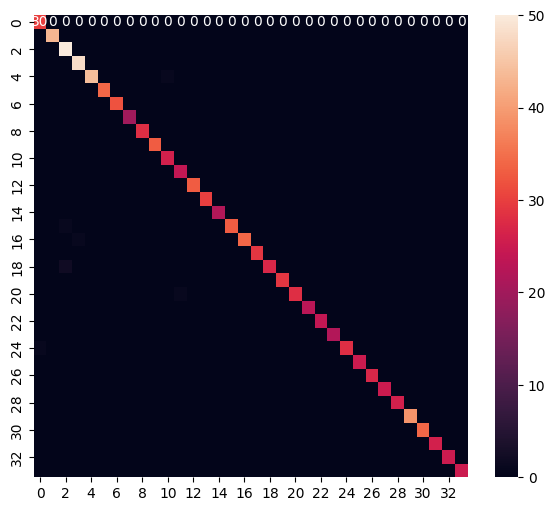

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        43
           2       0.94      1.00      0.97        50
           3       0.98      1.00      0.99        48
           4       1.00      0.98      0.99        45
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        33
          10       0.96      1.00      0.98        26
          11       0.96      1.00      0.98        24
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        22
          15       1.00      0.97      0.99        34
          16       1.00      0.97      0.99        35
     

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [115]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpkfsdpzqt\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpkfsdpzqt\assets


25424

# Inference test

In [117]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [118]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [119]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [120]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [121]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.82978819e-14 1.22093189e-08 9.97840524e-01 2.01516870e-09
 2.84757416e-16 4.64278992e-06 8.70429943e-12 1.38699729e-09
 1.33790135e-08 1.82456914e-12 1.49825102e-14 1.03106738e-12
 5.84303265e-12 2.09599671e-06 3.47059742e-11 2.14720564e-03
 2.97510372e-09 3.18894990e-08 3.78977560e-08 3.51791686e-11
 2.26058705e-09 2.08552482e-08 1.59676597e-06 1.50833142e-08
 1.10451151e-06 1.01142749e-12 5.47032393e-08 2.31761351e-06
 4.14910151e-09 1.81657231e-08 8.45008132e-14 8.95291379e-16
 1.56882840e-09 4.83508472e-07]
2
